<a href="https://colab.research.google.com/github/BelanVaidehee/BMLpracticals/blob/main/Experiment10bml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import files
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart (1).csv to heart (1).csv


In [ ]:
file_name = next(iter(uploaded))
print("Loaded file:", file_name)

df = pd.read_csv(io.BytesIO(uploaded[file_name]))

print("\nFirst 5 rows of data:")
print(df.head())

print("\nColumns in dataset:")
print(df.columns)


Loaded file: heart (1).csv

First 5 rows of data:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

Columns in dataset:
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [ ]:
df_features = df.copy()
y = None

if 'target' in df_features.columns:
    y = df_features['target']
    df_features = df_features.drop(columns=['target'])
    print("\nDropped 'target' column for PCA (unsupervised).")

df_features = df_features.select_dtypes(include=[np.number])

print("\nNumeric feature columns used for PCA:")
print(df_features.columns)

df_features = df_features.dropna()
if y is not None:

    y = y.loc[df_features.index]

print("\nShape of feature data after dropping NaNs:", df_features.shape)


Dropped 'target' column for PCA (unsupervised).

Numeric feature columns used for PCA:
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

Shape of feature data after dropping NaNs: (1025, 13)


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_features)


In [ ]:
pca = PCA(n_components=None)
X_pca = pca.fit_transform(X_scaled)


In [ ]:
explained_var = pca.explained_variance_ratio_
cum_explained_var = np.cumsum(explained_var)

print("\nExplained variance ratio for each principal component:")
for i, v in enumerate(explained_var, start=1):
    print(f"PC{i}: {v:.4f}")


Explained variance ratio for each principal component:
PC1: 0.2137
PC2: 0.1197
PC3: 0.0924
PC4: 0.0899
PC5: 0.0769
PC6: 0.0748
PC7: 0.0674
PC8: 0.0591
PC9: 0.0558
PC10: 0.0485
PC11: 0.0402
PC12: 0.0332
PC13: 0.0284


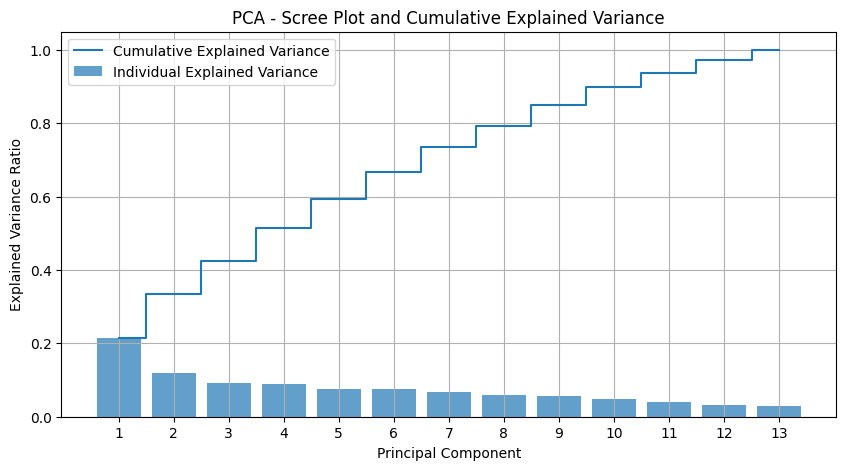

In [ ]:
components = np.arange(1, len(explained_var) + 1)

plt.figure(figsize=(10, 5))

plt.bar(components, explained_var, alpha=0.7, label='Individual Explained Variance')

plt.step(components, cum_explained_var, where='mid', label='Cumulative Explained Variance')

plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("PCA - Scree Plot and Cumulative Explained Variance")
plt.xticks(components)
plt.ylim(0, 1.05)
plt.grid(True)
plt.legend()
plt.show()

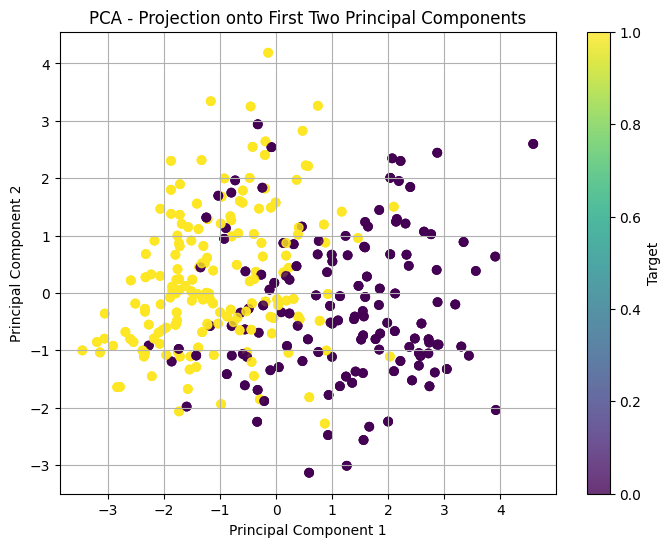

In [ ]:
pc1 = X_pca[:, 0]
pc2 = X_pca[:, 1]

plt.figure(figsize=(8, 6))

if y is not None:

    scatter = plt.scatter(pc1, pc2, c=y, cmap='viridis', alpha=0.8)
    cbar = plt.colorbar(scatter)
    cbar.set_label('Target')
else:
    plt.scatter(pc1, pc2, alpha=0.8)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA - Projection onto First Two Principal Components")
plt.grid(True)
plt.show()

In [ ]:
components_df = pd.DataFrame(
    pca.components_,
    columns=df_features.columns,
    index=[f"PC{i}" for i in range(1, len(pca.components_) + 1)]
)

print("\nPCA Components (loadings of each original feature on PCs):")
print(components_df)


PCA Components (loadings of each original feature on PCs):
           age       sex        cp  trestbps      chol       fbs   restecg  \
PC1   0.309574  0.078073 -0.285616  0.178760  0.127985  0.080713 -0.129490   
PC2   0.398286 -0.379076  0.274947  0.438909  0.369819  0.321476 -0.244760   
PC3  -0.070616  0.618113  0.198286  0.154674 -0.251021  0.447107 -0.238472   
PC4   0.053975  0.006604 -0.403411 -0.128736  0.468203 -0.176946 -0.179450   
PC5   0.290981 -0.049592 -0.188481 -0.241707 -0.305881  0.233021  0.274561   
PC6   0.204218 -0.015825  0.228271  0.139863  0.005674 -0.280946  0.632247   
PC7  -0.249728 -0.184611 -0.216087  0.310433  0.061741  0.517997  0.511241   
PC8   0.235570  0.104707 -0.122017  0.622511 -0.411463 -0.361286 -0.076549   
PC9  -0.383547 -0.198855 -0.327642  0.289129 -0.154697 -0.224158 -0.115155   
PC10 -0.004413  0.546399  0.141045  0.144485  0.482187 -0.188297  0.251059   
PC11 -0.114808 -0.282643  0.594051 -0.066094 -0.100810 -0.159852 -0.099845   
PC12